In [43]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,model_selection,svm,neighbors,linear_model
from sklearn.svm import SVC

In [44]:
df = pd.read_csv("C:/Users/nilot/Downloads/flight_delay_prediction/flight_delay_prediction/dataset.csv")

c:\users\nilot\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
df.drop(['YEAR',
	'MONTH',
	'DAY_OF_MONTH',
	'CARRIER',
	'ORIGIN_AIRPORT_ID',
	'DEST_AIRPORT_ID',
	'CRS_ARR_TIME',
	'ARR_DELAY',
	'ARR_DEL15',
	'SkyCondition'],1,inplace = True)

In [46]:
for i in range(len(df['CANCELLED'])):
	if(df['CANCELLED'][i] == 1):
		df.drop(i,0,inplace = True)

In [47]:
df['DryBulbCelsius'] = pd.to_numeric(df['DryBulbCelsius'],errors = 'coerce')
df['Visibility'] = pd.to_numeric(df['Visibility'],errors = 'coerce')
df['WindSpeed'] = pd.to_numeric(df['WindSpeed'],errors = 'coerce')
df['WindDirection'] = pd.to_numeric(df['WindDirection'],errors = 'coerce')
df['StationPressure'] = pd.to_numeric(df['StationPressure'],errors = 'coerce')

In [48]:
df.fillna(df.mean(),inplace = True) # filling the NAN vslues with mean

In [49]:
# Creating Classes 
def create_classes(y):
	for i in range(len(y)):
		y[i] = int(y[i]/15.0)
	return y

In [50]:
df.astype('float64')  # assign datatype

,DAY_OF_WEEK,FL_NUM,CRS_DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,CANCELLED,DryBulbCelsius,Visibility,WindSpeed,WindDirection,StationPressure
0,6.0,1142.0,1322.0,34.0,1.0,0.0,30.0,10.0,13.000000,130.000000,30.05
1,6.0,1143.0,1715.0,102.0,1.0,0.0,7.2,10.0,0.000000,0.000000,30.21
2,6.0,1462.0,630.0,0.0,0.0,0.0,14.4,1.0,0.000000,0.000000,28.96
3,6.0,1463.0,945.0,0.0,0.0,0.0,7.2,10.0,5.000000,80.000000,30.18
4,7.0,1142.0,1322.0,85.0,1.0,0.0,28.3,10.0,20.000000,120.000000,30.06
5,7.0,1143.0,1715.0,57.0,1.0,0.0,7.2,10.0,5.000000,170.668198,30.11
6,1.0,1142.0,1322.0,83.0,1.0,0.0,32.2,10.0,7.000000,280.000000,30.00
7,1.0,1143.0,1715.0,62.0,1.0,0.0,13.9,10.0,11.000000,270.000000,29.38
8,1.0,1462.0,630.0,0.0,0.0,0.0,15.6,9.0,6.000000,260.000000,28.88
9,1.0,1463.0,945.0,0.0,0.0,0.0,7.2,3.0,8.000000,90.000000,29.53


In [51]:
y = np.array(df['DEP_DELAY_NEW'])
y = create_classes(y)

In [52]:
X = np.array(df.drop(['DEP_DELAY_NEW','DEP_DEL15'],axis = 1))
X = preprocessing.scale(X)

In [53]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2)  # split train, test data

In [54]:
clf = SVC(kernel="linear",gamma='auto',C=10)  # Applying SVM classifier with "linear" kernel

In [55]:
clf.fit(X_train,y_train) # fitting train values to classifier 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))  # Print the output [Probability to be delayed]

Accuracy: 79.76104272266473%


In [57]:
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [59]:
X = (df[['WindSpeed', 'Visibility']])
y = (df['DEP_DELAY_NEW'])

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X.values, y.values) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
y=y.astype(int)

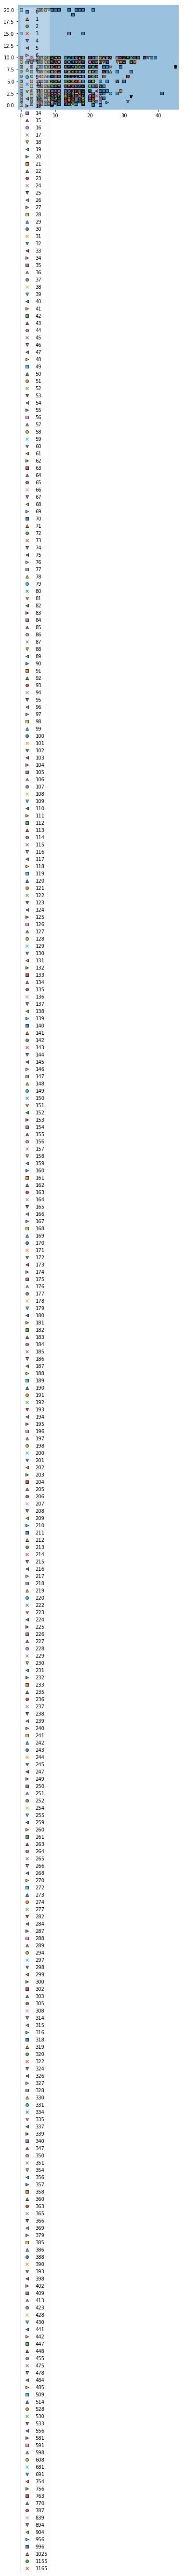

In [61]:
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)